# Human Resources

This presumably fictional dataset is from Kaggle by Professor Rich Huebner:

* https://www.kaggle.com/datasets/rhuebner/human-resources-data-set

Version 14 is used.

Here I go into depth on my data cleaning and my business analytical approach in converting this data into actionable insights. Skip to the **"Data exploration"** section for the latter.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import seaborn as sns
import matplotlib.ticker as ticker

hr = pd.read_csv('data\human_resources_dataset_v14.csv')

hr

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


## Data checking and cleaning

Checking appropriateness of data types and converting where needed.

In [63]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

### Date/time data types

There are date columns with ambiguous 8 character values. The non-ambiguous ones have 10 string characters:

e.g. '04/19/90' vs '11/05/1978'

If we do not prefix '19' to these 8 character dates, then they might incorrectly be prefixed with '20' if we were to convert them to the date data type.

All four date-related columns contain 8 digit dates with other length variations.

In [64]:
def min_max_lengths(column):
    column_lengths = []
    for i in column.dropna():
        column_lengths.append(len(i))
    print(f'min: {min(column_lengths)} max: {max(column_lengths)}')

print('DOB column:')
min_max_lengths(hr.DOB)
print('')
print('DateofHire column:')
min_max_lengths(hr.DateofHire)
print('')
print('DateofTermination column:')
min_max_lengths(hr.DateofTermination)
print('')
print('LastPerformanceReview_Date column:')
min_max_lengths(hr.LastPerformanceReview_Date)

DOB column:
min: 8 max: 8

DateofHire column:
min: 8 max: 10

DateofTermination column:
min: 8 max: 10

LastPerformanceReview_Date column:
min: 8 max: 10


**Checking the "year" component for every date-related column**

So we will check the year values for each column before assigning the date data type.

It appears we will need to prefix "19" to the years for all of the DOB column's values.

In [65]:
def getyearsfromdates(datecolumn):
    checkyears = []
    datecolumn = datecolumn.dropna()
    for i in datecolumn:
        checkyears.append(i[i.rindex('/')+1:len(i)])
    checkyears = list(dict.fromkeys(checkyears))
    checyears_sorted = checkyears.sort()
    print(checkyears)

print('DOB column:')
getyearsfromdates(hr.DOB)

DOB column:
['51', '52', '53', '54', '55', '58', '59', '61', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92']


Whereas the other 3 date columns are fine to convert as-is to date data type.

In [66]:
print('DateofHire column:')
getyearsfromdates(hr.DateofHire)
print('')

print('DateofTermination column:')
getyearsfromdates(hr.DateofTermination)
print('')

print('LastPerformanceReview_Date column:')
getyearsfromdates(hr.LastPerformanceReview_Date)

DateofHire column:
['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

DateofTermination column:
['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

LastPerformanceReview_Date column:
['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


**Substitute string-based DOB column that has unclear years**

I can't seem to replace an existing value based on a formula using that existing value.

e.g.
```
row['DOB_'] = pd.to_datetime(row['DOB_'][0:6] + '19' + row['DOB_'][6:8])
```
* So instead, we will suffix the existing string-based DOB column with "_"
* Then create a new column using the original DOB name and apply the formula to it
* Lastly, we will delete the "_" suffixed column

In [67]:
hr.rename(columns={'DOB':'DOB_'}, inplace=True)

hr.insert(15, 'DOB', None, allow_duplicates=True)

for i, row in hr.iterrows():
    if len(row['DOB_']) == 8:
        hr.loc[i, 'DOB'] = pd.to_datetime(row['DOB_'][0:6] + '19' + row['DOB_'][6:8]).date()
    else:
        hr.loc[i, 'DOB'] = pd.to_datetime(row['DOB_']).date()

hr = hr.drop('DOB_', axis=1)

In [68]:
print(hr.DOB[0])
print(type(hr.DOB[0]))

1983-07-10
<class 'datetime.date'>


**Convert other date columns as-is to date data type**

In [69]:
hr.DateofHire = pd.to_datetime(hr.DateofHire).dt.date
hr.DateofTermination = pd.to_datetime(hr.DateofTermination).dt.date
hr.LastPerformanceReview_Date = pd.to_datetime(hr.LastPerformanceReview_Date).dt.date

In [70]:
print(hr.DateofHire[0])
print(type(hr.DateofHire[0]))

2011-07-05
<class 'datetime.date'>


**Finding date discrepancies**

Let's ensure that there are no hire dates greater than termination dates...

In [71]:
hr[['EmpID', 'DateofHire','LastPerformanceReview_Date','DateofTermination', 'EmploymentStatus', 'TermReason']].query('DateofHire > DateofTermination')

,EmpID,DateofHire,LastPerformanceReview_Date,DateofTermination,EmploymentStatus,TermReason


...nor last performance review date:

In [72]:
hr[['EmpID','DateofHire', 'LastPerformanceReview_Date', 'DateofTermination', 'EmploymentStatus', 'TermReason']].query('DateofHire > LastPerformanceReview_Date')

,EmpID,DateofHire,LastPerformanceReview_Date,DateofTermination,EmploymentStatus,TermReason
104,10142,2014-07-07,2014-01-15,2015-09-05,Terminated for Cause,attendance
108,10246,2015-02-16,2015-01-20,2015-03-15,Terminated for Cause,"no-call, no-show"


Going by the dates, EmpID:
* **10142** was last reviewed 15th Jan '14 (for initial re-hire?), but was then "re-hired" on 7th July '14, then fired for poor attendance on 7th July '15.
* **10246** was was last reviewed 20th Jan '15 (for initial hire?), but was then "re-hired" on 16th Feb '15, then fired for no show on 15th March '15.

Considering how crazy the termination reasons are, the above discrepancies might not be so far-fetched, but we'd need to account for them in subsequent code.

To give ourselves context, we'll pivot EmploymantStatus alongside TermReason.

In [73]:
hr[['EmpID', 'EmploymentStatus', 'TermReason']].groupby(['EmploymentStatus', 'TermReason']).EmpID.count()

EmploymentStatus        TermReason                      
Active                  N/A-StillEmployed                   207
Terminated for Cause    Fatal attraction                      1
                        Learned that he is a gangster         1
                        attendance                            6
                        gross misconduct                      1
                        no-call, no-show                      4
                        performance                           3
Voluntarily Terminated  Another position                     20
                        attendance                            1
                        career change                         9
                        hours                                 8
                        maternity leave - did not return      3
                        medical issues                        3
                        military                              4
                        more money             

Next we check if there are performance dates greater than termination dates.

It seems very strange and highly unlikely for EmpID **10305** to have a performance review half a year after terminatation. Unless they were re-hired after their last termination?

In [74]:
hr[['EmpID','DateofHire', 'LastPerformanceReview_Date', 'DateofTermination', 'EmploymentStatus', 'TermReason']].query('LastPerformanceReview_Date > DateofTermination')

,EmpID,DateofHire,LastPerformanceReview_Date,DateofTermination,EmploymentStatus,TermReason
95,10305,2014-09-29,2019-01-28,2018-08-19,Terminated for Cause,Fatal attraction


Since the context of these 3 records are unclear, we will omit them from the dataset entirely.

In [75]:
indexhrtodelete = hr[ (hr['EmpID'] == 10142) | (hr['EmpID'] == 10246) | (hr['EmpID'] == 10305) ].index
hr.drop(indexhrtodelete , inplace=True)
hr.query('EmpID == 10142 | EmpID == 10246 | EmpID == 10305')

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


If we wanted to update the dates on the assumption they were entered incorrectly, the code we could use is:

```
hr.loc[hr.EmpID == 10305, 'LastPerformanceReview_Date'] = datetime(2018, 1, 28).date()
```

### Integer data types

Before examining the existing numerical data types, we'll add new columns that derive from the date columns we cleaned.

**Add a column for age**

From the DOB column, we can derive age.

https://stackoverflow.com/questions/2217488/age-from-birthdate-in-python

In [76]:
hr.insert(16, "Age", None, allow_duplicates=True)

for i, row in hr.iterrows():
    hr.loc[i, 'Age'] = (datetime.today().date() - row['DOB']) // timedelta(days=365.2425)

In [77]:
# hr[['EmpID', 'Age']].groupby(['Age']).EmpID.count()

Because we are using today's date (as at time of writing, April 2023), no-one in this dataset is in their 20s, which seems a tad unrealistic. So we will set a manual date to represent "today" then re-process the ages.

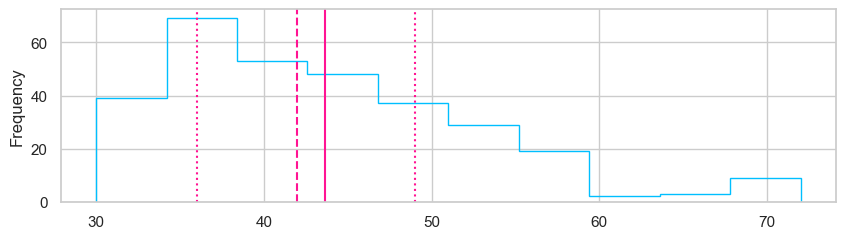

In [78]:
hr.Age.plot(kind='hist', histtype='step', bins=10, color='deepskyblue')

plt.axvline(hr.Age.mean(), color='deeppink')
plt.axvline(hr.Age.median(), color='deeppink', linestyle='--')
plt.axvline(hr.Age.quantile(0.25), color='deeppink', linestyle=':')
plt.axvline(hr.Age.quantile(0.75), color='deeppink', linestyle=':')

We need to know what we're limited to setting that fake "today" date to, by finding the most recent performance review date.

In [79]:
hr.LastPerformanceReview_Date.max()

datetime.date(2019, 2, 28)

So we will set the "current date" a month after that last review, then calculate the age column.

In [80]:
currentdate = datetime(2019, 4, 4).date()

for i, row in hr.iterrows():
    hr.loc[i, 'Age'] = (currentdate - row['DOB']) // timedelta(days=365.2425)

hr.Age = hr.Age.astype('int64')

In [81]:
# hr[['EmpID', 'Age']].groupby(['Age']).EmpID.count()

This distribution looks much more realistic.

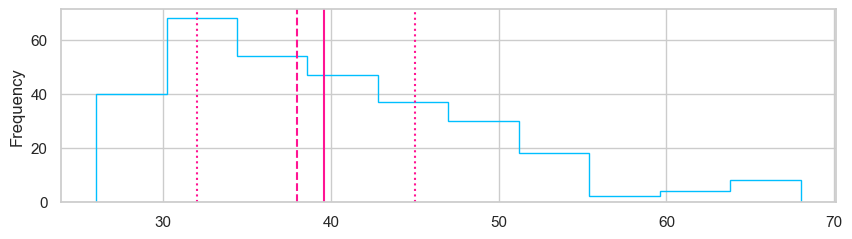

In [82]:
hr.Age.plot(kind='hist', histtype='step', bins=10, color='deepskyblue')

plt.axvline(hr.Age.mean(), color='deeppink')
plt.axvline(hr.Age.median(), color='deeppink', linestyle='--')
plt.axvline(hr.Age.quantile(0.25), color='deeppink', linestyle=':')
plt.axvline(hr.Age.quantile(0.75), color='deeppink', linestyle=':')

**Validate termination binary**

Next we validate if the Termd column reflects a terminated date, so we can use it as a condition later to calculate years of service. We validate this by creating a dataframe with a new column named "Terminated" based on whether or not termination date is null, then pivot the results.

If the data is reliable, it should appear like this:

```
Temd Terminated
   0          0
   1          1
```

Any other combination would need more investigation. In this case, we can rely on that data.

In [83]:
checkTermd = hr[['EmpID', 'Termd', 'DateofTermination']].copy()

checkTermd.insert(2, "Terminated", None, allow_duplicates=True)
for i, row in checkTermd.iterrows():
    if pd.isnull(checkTermd.loc[i, 'DateofTermination']):
        checkTermd.loc[i, 'Terminated'] = 0
    else:
        checkTermd.loc[i, 'Terminated'] = 1

checkTermd[['EmpID', 'Termd', 'Terminated']].groupby(['Termd', 'Terminated']).EmpID.count()

Termd  Terminated
0      0             207
1      1             101
Name: EmpID, dtype: int64

**Add a column for number of months employed**

From the DateofHire and DateofTermination columns, we can derive years of service.

In [84]:
hr.insert(24, "MonthsofService", None, allow_duplicates=True)

for i, row in hr.iterrows():
    if row['Termd'] == 1:
        hr.loc[i, 'MonthsofService'] = (row['DateofTermination'] - row['DateofHire']) // (timedelta(days=365.2425) // 12)
    else:
        hr.loc[i, 'MonthsofService'] = (currentdate - row['DateofHire']) // (timedelta(days=365.2425) // 12)

hr.MonthsofService = hr.MonthsofService.astype('int64')

**Add a column for number of months since last performance review**

For terminated employees, this calculates the months between their last review and their termination date.

For continuing employees, this calculates the months between their last review and the "current" date.

In [85]:
hr.insert(36, "MonthsSinceLastReview", None, allow_duplicates=True)

for i, row in hr.iterrows():
    if row['Termd'] == 1:
        hr.loc[i, 'MonthsSinceLastReview'] = (row['DateofTermination'] - row['LastPerformanceReview_Date']) // (timedelta(days=365.2425) // 12)
    else:
        hr.loc[i, 'MonthsSinceLastReview'] = (currentdate - row['LastPerformanceReview_Date']) // (timedelta(days=365.2425) // 12)

hr.MonthsSinceLastReview = hr.MonthsSinceLastReview.astype('Int64')

In [86]:
hr[['EmpID', 'MonthsSinceLastReview']].groupby(['MonthsSinceLastReview']).EmpID.count()

MonthsSinceLastReview
0      10
1      98
2     132
3      12
4       5
5       8
6       5
7       5
8       4
9       8
10      1
11      3
12      5
13      4
14      2
15      2
17      2
19      1
20      1
Name: EmpID, dtype: int64

In [87]:
hr.sort_values('MonthsSinceLastReview', ascending=False)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,MonthsSinceLastReview,DaysLateLast30,Absences
121,"Guilianno, Mike",10109,0,0,1,5,6,3,0,71707,...,17.0,LinkedIn,Fully Meets,4.50,5,0,2013-02-01,20,0,20
188,"Miller, Ned",10298,0,0,1,5,5,1,0,55800,...,12.0,LinkedIn,PIP,3.00,2,0,2013-01-14,19,6,6
32,"Bunbury, Jessica",10188,1,1,0,5,6,3,0,74326,...,17.0,Google Search,Fully Meets,3.14,5,0,2013-02-10,17,1,19
216,"Perry, Shakira",10171,0,0,0,5,5,3,0,45998,...,11.0,LinkedIn,Fully Meets,3.45,4,0,2014-05-13,17,0,5
302,"Wilkes, Annie",10204,0,2,0,5,5,3,0,58062,...,19.0,Google Search,Fully Meets,3.60,5,0,2011-02-06,15,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,"Roberson, May",10230,0,2,0,5,5,3,0,64971,...,14.0,Google Search,Fully Meets,4.50,4,0,2011-10-22,0,0,10
292,"Voldemort, Lord",10118,1,1,1,4,3,3,0,113999,...,4.0,Employee Referral,Fully Meets,4.33,3,7,2017-02-15,0,0,9
289,"Veera, Abdellah",10014,0,2,1,5,5,4,0,58523,...,20.0,LinkedIn,Exceeds,4.50,5,0,2016-02-01,0,0,15
212,"Patronick, Lucas",10005,0,0,1,5,4,4,1,108987,...,10.0,Diversity Job Fair,Exceeds,5.00,5,3,2015-08-16,0,0,13


### Integer data types

Now we check if columns with data type float64 are appropriately assigned.

In [88]:
hr[['ManagerID', 'EngagementSurvey']].head(3)

,ManagerID,EngagementSurvey
0,22.0,4.60
1,4.0,4.96
2,20.0,3.02


In [89]:
pd.unique(hr.ManagerID)

array([22.,  4., 20., 16., 39., 11., 10., 19., 12.,  7., 14., 18., nan,
        3.,  2.,  1., 17.,  5., 21.,  6., 15., 13.,  9., 30.])

In [90]:
pd.unique(hr.EngagementSurvey)

array([4.6 , 4.96, 3.02, 4.84, 5.  , 3.04, 4.46, 4.2 , 4.28, 4.4 , 4.5 ,
       2.  , 4.8 , 3.5 , 3.39, 3.35, 3.19, 3.14, 4.51, 3.25, 3.84, 4.43,
       3.3 , 3.8 , 3.  , 4.3 , 3.58, 4.7 , 4.1 , 4.13, 3.7 , 4.73, 4.12,
       4.62, 3.1 , 3.96, 3.79, 1.93, 1.12, 3.01, 2.3 , 3.88, 3.4 , 4.11,
       4.77, 4.52, 2.9 , 2.1 , 4.  , 3.13, 1.56, 1.2 , 4.76, 3.66, 3.73,
       4.24, 3.97, 3.9 , 4.61, 4.63, 4.64, 4.17, 3.6 , 3.03, 4.48, 3.24,
       3.72, 2.34, 3.99, 3.75, 3.07, 4.83, 3.49, 3.38, 3.65, 4.78, 4.9 ,
       4.88, 4.53, 3.18, 4.65, 3.08, 3.93, 4.18, 4.37, 2.39, 3.81, 4.29,
       2.33, 4.25, 3.89, 3.54, 2.4 , 3.45, 4.16, 3.17, 4.15, 3.98, 4.36,
       3.69, 4.94, 2.6 , 3.51, 3.31, 4.81, 3.32, 4.68, 3.27, 1.81, 4.21,
       2.44, 2.81, 4.33, 3.21, 3.11, 2.5 , 3.42, 4.07, 3.2 ])

Only ManagerID seems to be incorrectly data typed, so we will fix that one.

In [91]:
hr.ManagerID = hr.ManagerID.astype('Int64')

hr.ManagerID.head(5)

0    22
1     4
2    20
3    16
4    39
Name: ManagerID, dtype: Int64

### Cleaning categoricals and their ID column counterparts

**MarriedStatusID and MaritalDesc**

According to https://rpubs.com/rhuebner/hrd_cb_v14, MaritalStatusID should match MaritalDesc.

Using a pivot, we confirmed this is the case, and they align to MarriedID too.

In [92]:
hr[['EmpID', 'MarriedID', 'MaritalStatusID', 'MaritalDesc']].groupby(['MarriedID','MaritalStatusID', 'MaritalDesc']).EmpID.count()

MarriedID  MaritalStatusID  MaritalDesc
0          0                Single         136
           2                Divorced        30
           3                Separated       12
           4                Widowed          7
1          1                Married        123
Name: EmpID, dtype: int64

**EmpStatusID and EmploymentStatus**

According to https://rpubs.com/rhuebner/hrd_cb_v14, EmpStatusID should match EmploymentStatus.

But this does not appear to be the case, as per pivot below:

In [93]:
hr[['EmpID', 'Termd', 'EmpStatusID', 'EmploymentStatus', 'TermReason']].groupby(['Termd', 'EmpStatusID', 'EmploymentStatus', 'TermReason']).EmpID.count()

Termd  EmpStatusID  EmploymentStatus        TermReason                      
0      1            Active                  N/A-StillEmployed                   182
       2            Active                  N/A-StillEmployed                    11
       3            Active                  N/A-StillEmployed                    14
1      1            Terminated for Cause    no-call, no-show                      1
       4            Terminated for Cause    Learned that he is a gangster         1
                                            attendance                            5
                                            gross misconduct                      1
                                            no-call, no-show                      2
                                            performance                           3
       5            Voluntarily Terminated  Another position                     20
                                            attendance                            1

So we will clean EmpStatusID for consistency.

The reason we are making Active 0 and Terminated 1, is to align it with Termd.

In [94]:
hr.loc[hr.EmploymentStatus == 'Active', 'EmpStatusID'] = 0
hr.loc[hr.EmploymentStatus == 'Terminated for Cause', 'EmpStatusID'] = 1
hr.loc[hr.EmploymentStatus == 'Voluntarily Terminated', 'EmpStatusID'] = 2

hr[['EmpID', 'Termd', 'EmpStatusID', 'EmploymentStatus']].groupby(['Termd', 'EmpStatusID', 'EmploymentStatus']).EmpID.count()

Termd  EmpStatusID  EmploymentStatus      
0      0            Active                    207
1      1            Terminated for Cause       13
       2            Voluntarily Terminated     88
Name: EmpID, dtype: int64

**GenderID and Sex**

Sex and GenderID appear to match, so for consistency we will rename the GenderID column.

In [95]:
hr[['EmpID', 'Sex', 'GenderID']].groupby(['Sex', 'GenderID']).EmpID.count()

Sex  GenderID
F    0           174
M    1           134
Name: EmpID, dtype: int64

In [96]:
hr.rename(columns={'GenderID':'SexID'}, inplace=True)

**DeptID and Department**

This data is also inconsistent, and needs to be cleaned, as this pivot shows.

There are some records where Department has a lot of trailing spaces e.g. "Production       ".

In [97]:
hr[['EmpID', 'DeptID', 'Department']].groupby(['DeptID', 'Department']).EmpID.count()

DeptID  Department          
1       Admin Offices             9
        Software Engineering      1
2       Executive Office          1
3       IT/IS                    49
4       Software Engineering     10
5       Production              208
6       Production                1
        Sales                    29
Name: EmpID, dtype: int64

In [98]:
hr.loc[hr.Department == 'Software Engineering', 'DeptID'] = 4
hr.loc[hr.Department == 'Production       ', 'DeptID'] = 5
hr.loc[hr.Department == 'Sales', 'DeptID'] = 6

hr[['EmpID', 'DeptID', 'Department']].groupby(['DeptID', 'Department']).EmpID.count()

DeptID  Department          
1       Admin Offices             9
2       Executive Office          1
3       IT/IS                    49
4       Software Engineering     11
5       Production              209
6       Sales                    29
Name: EmpID, dtype: int64

**PerfScoreID and PerformanceScore**

A PerformanceScore of PIP should mean Performance Improvement Plan i.e. lowest rank.

So we will update that value to make it clearer, as well as clean up discrepant values.

In [99]:
hr[['EmpID', 'PerfScoreID', 'PerformanceScore']].groupby(['PerfScoreID', 'PerformanceScore']).EmpID.count()

PerfScoreID  PerformanceScore 
1            Fully Meets            1
             PIP                   12
2            Needs Improvement     18
3            Fully Meets          240
4            Exceeds               37
Name: EmpID, dtype: int64

In [100]:
hr.loc[hr.PerformanceScore == 'Fully Meets', 'PerfScoreID'] = 3
hr.loc[hr.PerformanceScore == 'PIP', 'PerformanceScore'] = 'Performance Improvement Plan'

hr[['EmpID', 'PerfScoreID', 'PerformanceScore']].groupby(['PerfScoreID', 'PerformanceScore']).EmpID.count()

PerfScoreID  PerformanceScore            
1            Performance Improvement Plan     12
2            Needs Improvement                18
3            Fully Meets                     241
4            Exceeds                          37
Name: EmpID, dtype: int64

**PositionID and Position**

There are quite a few amendmens that need to be done here.

In [101]:
hr[['EmpID', 'PositionID', 'Position']].groupby(['PositionID', 'Position']).EmpID.count()

PositionID  Position                    
1           Accountant I                      3
2           Administrative Assistant          3
3           Area Sales Manager               25
4           BI Developer                      4
5           BI Director                       1
6           CIO                               1
7           Data Architect                    1
8           Database Administrator            4
9           Data Analyst                      7
            Data Analyst                      1
10          Director of Operations            1
11          Director of Sales                 1
12          IT Director                       1
13          IT Manager - DB                   2
            IT Manager - Infra                1
            IT Manager - Support              1
14          IT Support                        8
15          Network Engineer                  5
16          President & CEO                   1
17          Production Manager                1

In [102]:
hr.loc[hr.Position == 'Data Analyst ', 'Position'] = 'Data Analyst'
hr.loc[hr.Position == 'Production Manager', 'PositionID'] = 17
hr.loc[hr.Position == 'Production Technician I', 'PositionID'] = 18
hr.loc[hr.Position == 'Production Technician II', 'PositionID'] = 19
hr.loc[hr.Position == 'Sales Manager', 'PositionID'] = 20
hr.loc[hr.Position == 'Senior BI Developer', 'PositionID'] = 21
hr.loc[hr.Position == 'Shared Services Manager', 'PositionID'] = 22
hr.loc[hr.Position == 'Software Engineer', 'PositionID'] = 23
hr.loc[hr.Position == 'Software Engineering Manager', 'PositionID'] = 24
hr.loc[hr.Position == 'Sr. Accountant', 'PositionID'] = 25
hr.loc[hr.Position == 'Sr. DBA', 'PositionID'] = 26
hr.loc[hr.Position == 'Sr. Network Engineer', 'PositionID'] = 27
hr.loc[hr.Position == 'Principal Data Architect', 'PositionID'] = 28
hr.loc[hr.Position == 'Enterprise Architect', 'PositionID'] = 29



hr[['EmpID', 'PositionID', 'Position']].groupby(['PositionID', 'Position']).EmpID.count()

PositionID  Position                    
1           Accountant I                      3
2           Administrative Assistant          3
3           Area Sales Manager               25
4           BI Developer                      4
5           BI Director                       1
6           CIO                               1
7           Data Architect                    1
8           Database Administrator            4
9           Data Analyst                      8
10          Director of Operations            1
11          Director of Sales                 1
12          IT Director                       1
13          IT Manager - DB                   2
            IT Manager - Infra                1
            IT Manager - Support              1
14          IT Support                        8
15          Network Engineer                  5
16          President & CEO                   1
17          Production Manager               14
18          Production Technician I         137

**Add a column to separate people managers from individual contributors based on Position**

We will make this a binary field and name it PositionTypeID with these values/meanings:
 - 0 = People manager
 - 1 = Individual contributor

In [103]:
hr.insert(11, "PositionTypeID", 1, allow_duplicates=True)

for i, row in hr.iterrows():
    if row['PositionID'] == 5 or row['PositionID'] == 6 or row['PositionID'] == 10 or row['PositionID'] == 11 or row['PositionID'] == 12 or row['PositionID'] == 13 or row['PositionID'] == 16 or row['PositionID'] == 17 or row['PositionID'] == 20 or row['PositionID'] == 22 or row['PositionID'] == 24:
        hr.loc[i, 'PositionTypeID'] = 0

In [104]:
hr[['EmpID', 'PositionTypeID']].groupby(['PositionTypeID']).EmpID.count()

PositionTypeID
0     29
1    279
Name: EmpID, dtype: int64

**RaceDesc and HispanicLatino**

There is a mix of upper and lowercase for the HispanicLatino column, so we will amend these.

In [105]:
hr[['EmpID', 'RaceDesc', 'HispanicLatino']].groupby(['RaceDesc', 'HispanicLatino']).EmpID.count()

RaceDesc                          HispanicLatino
American Indian or Alaska Native  No                  3
Asian                             No                 29
Black or African American         No                 71
                                  Yes                 8
Hispanic                          yes                 1
Two or more races                 No                 10
                                  Yes                 1
White                             No                166
                                  Yes                18
                                  no                  1
Name: EmpID, dtype: int64

In [106]:
hr.loc[hr.HispanicLatino == 'yes', 'HispanicLatino'] = 'Yes'
hr.loc[hr.HispanicLatino == 'no', 'HispanicLatino'] = 'No'

hr[['EmpID', 'HispanicLatino']].groupby(['HispanicLatino']).EmpID.count()

HispanicLatino
No     280
Yes     28
Name: EmpID, dtype: int64

**ManagerID and ManagerName**

If we recall, EmpIDs are 5 digit figures, but the ManagerIDs are up to 2 digit figures only, meaning there is no join possible here as-is i.e. the Manager IDs are arbitrary.

Also, 2 manager names (Brandon R. LeBlanc & Michael Albert) have each been associated to 2 different manager IDs, so we'll assume they are one person and the IDs need to be merged.

But the biggest highlight is that the ManagerNames are also arbitrary as some of them do not exist as employee names, and there is one called "Board of Directors".

In [107]:
hr[['EmpID', 'ManagerName', 'ManagerID']].groupby(['ManagerName', 'ManagerID']).EmpID.count()

ManagerName         ManagerID
Alex Sweetwater     10            9
Amy Dunn            11           21
Board of Directors  9             2
Brandon R. LeBlanc  1             6
                    3             1
Brannon Miller      12           22
Brian Champaigne    13            8
David Stanley       14           21
Debra Houlihan      15            3
Elijiah Gray        16           22
Eric Dougall        6             4
Janet King          2            19
Jennifer Zamora     5             7
John Smith          17           13
Kelley Spirea       18           22
Ketsia Liebig       19           21
Kissy Sullivan      20           22
Lynn Daneault       21           12
Michael Albert      22           21
                    30            1
Peter Monroe        7            14
Simon Roup          4            16
Webster Butler      39           13
Name: EmpID, dtype: int64

In [108]:
hr.loc[hr.ManagerName == 'Brandon R. LeBlanc', 'ManagerID'] = 1
hr.loc[hr.ManagerName == 'Michael Albert', 'ManagerID'] = 22

hr[['EmpID', 'ManagerName', 'ManagerID']].groupby(['ManagerName', 'ManagerID']).EmpID.count()

ManagerName         ManagerID
Alex Sweetwater     10            9
Amy Dunn            11           21
Board of Directors  9             2
Brandon R. LeBlanc  1             7
Brannon Miller      12           22
Brian Champaigne    13            8
David Stanley       14           21
Debra Houlihan      15            3
Elijiah Gray        16           22
Eric Dougall        6             4
Janet King          2            19
Jennifer Zamora     5             7
John Smith          17           13
Kelley Spirea       18           22
Ketsia Liebig       19           21
Kissy Sullivan      20           22
Lynn Daneault       21           12
Michael Albert      22           22
Peter Monroe        7            14
Simon Roup          4            16
Webster Butler      39           13
Name: EmpID, dtype: int64

Checking the values in other fields that do not need amendment...

**FromDiversityJobFairID and RecruitmentSource**

In [109]:
hr[['EmpID', 'FromDiversityJobFairID', 'RecruitmentSource']].groupby(['FromDiversityJobFairID', 'RecruitmentSource']).EmpID.count()

FromDiversityJobFairID  RecruitmentSource      
0                       CareerBuilder              22
                        Employee Referral          30
                        Google Search              49
                        Indeed                     86
                        LinkedIn                   76
                        On-line Web application     1
                        Other                       2
                        Website                    13
1                       Diversity Job Fair         29
Name: EmpID, dtype: int64

**Add a column for RecruitmentSourceID**

In [110]:
hr.insert(31, "RecruitmentSourceID", 0, allow_duplicates=True)

hr.loc[hr.RecruitmentSource == 'Diversity Job Fair', 'RecruitmentSourceID'] = 1
hr.loc[hr.RecruitmentSource == 'Employee Referral', 'RecruitmentSourceID'] = 2
hr.loc[hr.RecruitmentSource == 'CareerBuilder', 'RecruitmentSourceID'] = 3
hr.loc[hr.RecruitmentSource == 'LinkedIn', 'RecruitmentSourceID'] = 4
hr.loc[hr.RecruitmentSource == 'Indeed', 'RecruitmentSourceID'] = 5
hr.loc[hr.RecruitmentSource == 'Google Search', 'RecruitmentSourceID'] = 6
hr.loc[hr.RecruitmentSource == 'Website', 'RecruitmentSourceID'] = 7
hr.loc[hr.RecruitmentSource == 'On-line Web application', 'RecruitmentSourceID'] = 8
hr.loc[hr.RecruitmentSource == 'Other', 'RecruitmentSourceID'] = 9

hr.RecruitmentSourceID = hr.RecruitmentSourceID.astype('Int64')





hr[['EmpID', 'FromDiversityJobFairID', 'RecruitmentSourceID', 'RecruitmentSource']].groupby(['FromDiversityJobFairID', 'RecruitmentSourceID', 'RecruitmentSource']).EmpID.count()

FromDiversityJobFairID  RecruitmentSourceID  RecruitmentSource      
0                       2                    Employee Referral          30
                        3                    CareerBuilder              22
                        4                    LinkedIn                   76
                        5                    Indeed                     86
                        6                    Google Search              49
                        7                    Website                    13
                        8                    On-line Web application     1
                        9                    Other                       2
1                       1                    Diversity Job Fair         29
Name: EmpID, dtype: int64

**CitizenDesc**

In [112]:
hr[['EmpID', 'CitizenDesc']].groupby(['CitizenDesc']).EmpID.count()

CitizenDesc
Eligible NonCitizen     12
Non-Citizen              4
US Citizen             292
Name: EmpID, dtype: int64

**EngagementSurvey**

In [113]:
hr[['EmpID', 'EngagementSurvey']].groupby(['EngagementSurvey']).EmpID.count()

EngagementSurvey
1.12     1
1.20     1
1.56     1
1.81     1
1.93     1
        ..
4.88     1
4.90     1
4.94     1
4.96     2
5.00    56
Name: EmpID, Length: 119, dtype: int64

**EmpSatisfaction**

In [114]:
hr[['EmpID', 'EmpSatisfaction']].groupby(['EmpSatisfaction']).EmpID.count()

EmpSatisfaction
1      2
2      9
3    108
4     92
5     97
Name: EmpID, dtype: int64

## Data exploration

Insights we want to know that could translate to business action and benefit:

**Good staff member qualities**
* High _**PerformanceScore**_ (need to factor in recent hires would be expected to be low performers).
* Honesty and positivity in _**EmpSatisfaction**_ (not necessarily a high value).
* Low _**Absences**_ (need to split by sex to account for maternity and other special considerations).
* Low _**DaysLateLast30**_.
  - We also need to understand how this field works: If this is the last 30 days before termination/resignation, or last 30 days from the current date. Why? Because there is a risk of misrepresentation in the latter case, e.g. those who resigned say for example 6 months ago but were late towards the end of their term. Does this value reflect that? Or will it show 0?

**Revising current HR practices**

These could be used to assess whether or not it is worth continuing to invest resources in certain HR activities.

* Check the effectiveness of the outsourced _**EngagementSurvey**_ in assessing employee quality.
* Check the effectiveness of the internal _**EmpSatisfaction**_ survey in reflecting employee behaviour (e.g. performance) and intention (e.g. resignation).
* Check if the number of months between _**LastPerformanceReview_Date**_ and termination date (i.e. _**MonthsSinceLastReview**_) are correlated with _**EmpStatusID**_ and _**EmploymentStatus**_. e.g. does high recency lead to increased or decreased chance of resignation?
* Check the effectiveness of _**PerfScoreID**_ and _**PerformanceScore**_ in reflecting other employee attributes.
* Cluster _**RecruitmentSource**_ to find correlation with poor performers.
* Check if diversity job fair hires (i.e. _**FromDiversityJobFairID**_) have proportionately high acceptance and retention rates.
* Check if any potential biases could be impacting _**PerformanceScore**_, e.g. false positives due to relational biases by number of projects handled or staff manager.

**Retained staff**
* Create clusters for:
  - High performing retained staff
  - High performing resigned staff
  - Then test retained staff using ML built on resigned staff as training data, to predict probability of resignation for current staff.
* Create either a rating or clustering system to identify generally good staff members.
  - Consider long-term employees who may be causing negativity or poor performance within their teams/departments, versus short-term employees who have a positive effect.

**Resigned and terminated staff**
* Find company-based factors for staff turnover and poor performance.
  - _**Salary**_
  - _**PositionID**_ e.g. the nature of the role is fundamentally too difficult.
  - _**Department**_ e.g. the possibility of a negative envionment.
  - _**SpecialProjectsCount**_ e.g. does too much or little of this correlate?
  - _**ManagerID**_

**Demographic analysis**

Check if demographic factors are correlated with employee performance and turnover. Consider creating clusters to show what types of people best work in specific departments, roles, and role types.
  - _**MaritalDesc**_
  - _**State**_
  - _**Zip**_
  - _**Age**_
  - _**Sex**_
  - _**MaritalDesc**_
  - _**CitizenDesc**_
  - _**HispanicLatino**_
  - _**RaceDesc**_


Here's an overview of the quantitative variables.

In [129]:
hr_quantitative = hr[['Salary', 'MonthsofService', 'PerfScoreID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'MonthsSinceLastReview', 'DaysLateLast30', 'Absences']]
hr_quantitative.describe()

,Salary,MonthsofService,PerfScoreID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,MonthsSinceLastReview,DaysLateLast30,Absences
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.0,308.000000,308.000000
mean,68899.597403,58.496753,2.983766,4.115714,3.886364,1.217532,2.964286,0.405844,10.259740
std,25137.454091,26.330213,0.579000,0.784040,0.911424,2.353475,3.460624,1.284168,5.875256
min,45046.000000,0.000000,1.000000,1.120000,1.000000,0.000000,0.0,0.000000,1.000000
25%,55397.500000,45.000000,3.000000,3.690000,3.000000,0.000000,1.0,0.000000,5.000000
50%,62734.500000,57.000000,3.000000,4.285000,4.000000,0.000000,2.0,0.000000,10.000000
75%,72001.000000,76.000000,3.000000,4.700000,5.000000,0.000000,2.0,0.000000,15.000000
max,250000.000000,158.000000,4.000000,5.000000,5.000000,8.000000,20.0,6.000000,20.000000


### Good staff member qualities
* High _**PerformanceScore**_ (recent hires are expected to be low performers).

  - Referenced a Stackoverflow article to define x-axis tick interval value of every 12 months.
  - https://stackoverflow.com/questions/43639096/setting-the-interval-of-x-axis-for-seaborn-plot

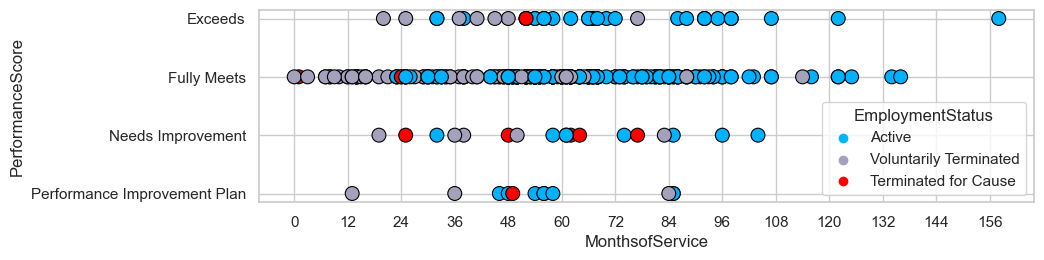

In [138]:
sns.set(rc={'figure.figsize':(10,2.5)})
sns.set_style("whitegrid")
palette_employment = ['#00B2FF', '#A3A1BB', '#FF0000']

scatter_performance = sns.scatterplot(data=hr, x='MonthsofService', y='PerformanceScore', hue='EmploymentStatus', s=100, alpha=1, edgecolor='0', marker='o', palette=sns.color_palette(palette_employment, 3))

scatter_performance.xaxis.set_major_locator(ticker.MultipleLocator(12))
scatter_performance.xaxis.set_major_formatter(ticker.ScalarFormatter())

- Observations from the above chart:
  - A large proportion of staff tend to voluntarily resign by the end of their 4th year, and mostly just fully meeting expected performance.
  - Proportionally fewer resignations from the 4th year onward, with a small but notable uptake in poor performance staff and forced terminations.

* Honesty and positivity in _**EmpSatisfaction**_ (not necessarily a high value).

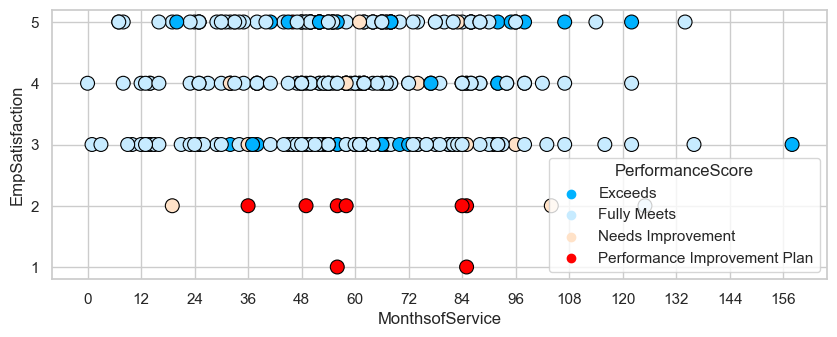

In [152]:
sns.set(rc={'figure.figsize':(10,3.5)})
sns.set_style("whitegrid")
palette_satisfaction = ['#00B2FF', '#C7EBFF', '#FFE2C8', '#FF0000']

scatter_performance = sns.scatterplot(data=hr, x='MonthsofService', y='EmpSatisfaction', hue='PerformanceScore', s=100, alpha=1, edgecolor='0', marker='o', palette=sns.color_palette(palette_satisfaction, 4))

scatter_performance.xaxis.set_major_locator(ticker.MultipleLocator(12))
scatter_performance.xaxis.set_major_formatter(ticker.ScalarFormatter())
scatter_performance.yaxis.set_major_locator(ticker.MultipleLocator(1))
scatter_performance.yaxis.set_major_formatter(ticker.ScalarFormatter())

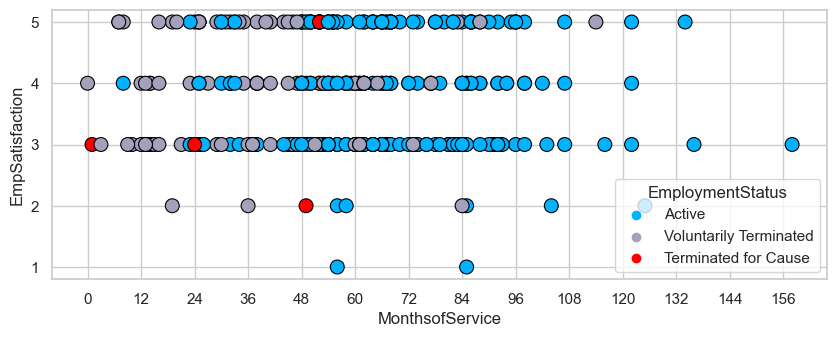

In [151]:
sns.set(rc={'figure.figsize':(10,3.5)})
sns.set_style("whitegrid")
palette_employment = ['#00B2FF', '#A3A1BB', '#FF0000']

scatter_performance = sns.scatterplot(data=hr, x='MonthsofService', y='EmpSatisfaction', hue='EmploymentStatus', s=100, alpha=1, edgecolor='0', marker='o', palette=sns.color_palette(palette_employment, 3))

scatter_performance.xaxis.set_major_locator(ticker.MultipleLocator(12))
scatter_performance.xaxis.set_major_formatter(ticker.ScalarFormatter())
scatter_performance.yaxis.set_major_locator(ticker.MultipleLocator(1))
scatter_performance.yaxis.set_major_formatter(ticker.ScalarFormatter())

In [55]:
hr.to_csv('test.csv', index=False)

YouTube video "Machine Leaning in Power BI" by Absent Data estimates employee churn
https://www.youtube.com/watch?v=l-83AtuHqM0

The code below is adapted from his video but used for a different dataset (ours taken from Kaggle).

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

dataset = hr.copy()
y = dataset['Termd']
features = ['SexID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'PositionTypeID', 'PositionID', 'Age', 'MonthsofService', 'ManagerID', 'RecruitmentSourceID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'MonthsSinceLastReview', 'DaysLateLast30', 'Absences']
# scales data
X = dataset[features]
s = StandardScaler()

# split and train
X_train, X_test, y_train, y_test = train_test_split(X,y)

# model predicts results
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X)
y_prob = log.predict_proba(X)[:,1]

# add columns to the dataframe
dataset['predictions'] = y_pred
dataset['probabilities'] = y_prob



ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

* Honesty and positivity in _**EmpSatisfaction**_ (not necessarily a high value).
* Low _**Absences**_ (need to split by sex to account for maternity and other special considerations).
* Low _**DaysLateLast30**_.
  - We also need to understand how this field works: If this is the last 30 days before termination/resignation, or last 30 days from the current date. Why? Because there is a risk of misrepresentation in the latter case, e.g. those who resigned say for example 6 months ago but were late towards the end of their term. Does this value reflect that? Or will it show 0?

Notes from: https://rpubs.com/rhuebner/hrd_cb_v14
* **PerfScoreID**	Performance Score code that matches the employee’s most recent performance score	Integer
* **FromDiversityJobFairID**	Was the employee sourced from the Diversity job fair? 1 or 0 for yes or no	
* **RecruitmentSource** The name of the recruitment source where the employee was recruited from	Text
* **PerformanceScore** Performance Score text/category (Fully Meets, Partially Meets, PIP, Exceeds)	Text
* **EngagementSurvey** Results from the last engagement survey, managed by our external partner	Float
* **EmpSatisfaction** A basic satisfaction score between 1 and 5, as reported on a recent employee satisfaction survey	Integer
* **SpecialProjectsCount** The number of special projects that the employee worked on during the last 6 months	Integer
* **DaysLateLast30** The number of times that the employee was late to work during the last 30 days	Integer
* **Absences** The number of times the employee was absent from work.	Integer


In [111]:
hr_resigned = hr.query('EmpStatusID == 2')
hr_terminated = hr.query('EmpStatusID == 1')

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8d4e56e10>,
 'caps': [<matplotlib.lines.Line2D at 0x2c8d4e4aa50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c8d4e56650>],
 'medians': [<matplotlib.lines.Line2D at 0x2c8d4e692d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c8d4e69b10>],
 'means': []}

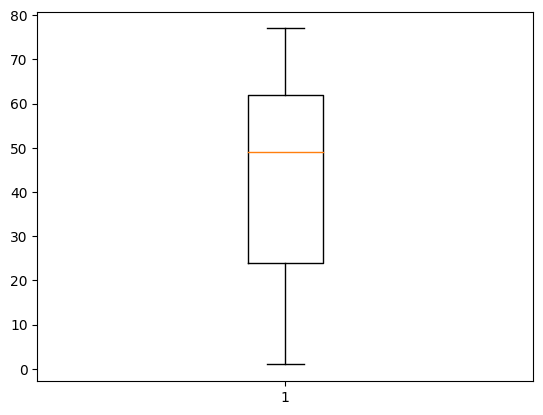

In [112]:
plt.boxplot(hr_terminated.MonthsofService)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8d4c47d10>,
 'caps': [<matplotlib.lines.Line2D at 0x2c8d3ea5a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c8d4c0ea10>],
 'medians': [<matplotlib.lines.Line2D at 0x2c8d3ea4510>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c8d4d24f50>],
 'means': []}

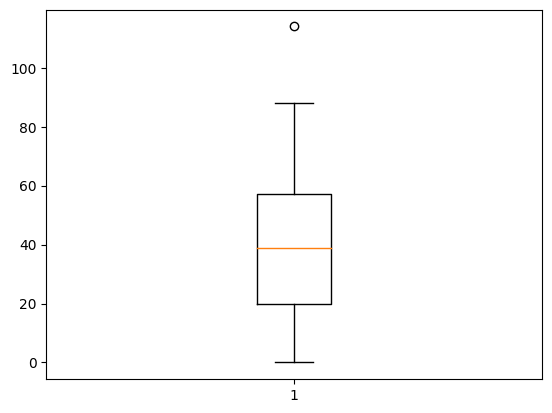

In [113]:
plt.boxplot(hr_resigned.MonthsofService)